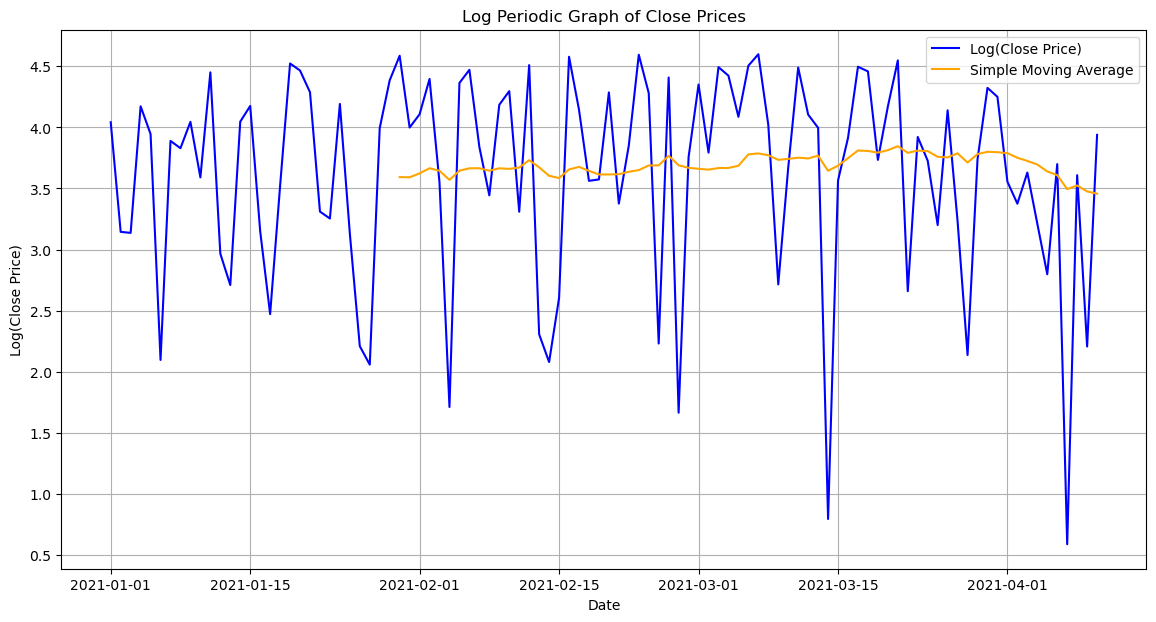

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the log periodic graph
def plot_log_periodic_graph(df):
    # Ensure the DataFrame contains the necessary columns
    required_columns = ['date', 'close']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Convert 'date' column to datetime if it's not already
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by date
    df = df.sort_values('date')

    # Calculate the logarithm of the closing prices
    df['log_close'] = np.log(df['close'])

    # Plot the log prices
    plt.figure(figsize=(14, 7))
    plt.plot(df['date'], df['log_close'], label='Log(Close Price)', color='blue')
    
    # Calculate a simple moving average to help identify potential bubbles
    window_size = 30  # You can adjust the window size
    df['SMA'] = df['log_close'].rolling(window=window_size).mean()

    # Plot the moving average
    plt.plot(df['date'], df['SMA'], label='Simple Moving Average', color='orange')

    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Log(Close Price)')
    plt.title('Log Periodic Graph of Close Prices')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a sample DataFrame
    data = {
        'date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
        'open': np.random.rand(100) * 100,
        'high': np.random.rand(100) * 100,
        'low': np.random.rand(100) * 100,
        'close': np.random.rand(100) * 100,
        'volume': np.random.randint(1, 1000, 100),
        'adjusted_volume': np.random.randint(1, 1000, 100)
    }
    df = pd.DataFrame(data)

    # Plot the log periodic graph
    plot_log_periodic_graph(df)


In [2]:
# import all the unclean data for aal five stocks into separate variables 
uDataAmazon = pd.read_csv('./data/Amazon.csv', index_col = False)
uDataApple = pd.read_csv('./data/Apple.csv')
uDataGoogle = pd.read_csv('./data/Google.csv')
uDataNetflix = pd.read_csv('./data/Netflix.csv')
uDataMicrosoft = pd.read_csv('./data/Microsoft.csv')

# combine all the temp data values into a list to perform mapping operations
uDataList = [ uDataAmazon, uDataApple, uDataGoogle, uDataMicrosoft, uDataNetflix ]

In [3]:
# clean data of amazon
cDataAmazon = uDataAmazon[['Date', 'Close']]
tempDataAmazon = cDataAmazon.copy()
cDataAmazon

,Date,Close
0,2000-01-03,4.468750
1,2000-01-04,4.096875
2,2000-01-05,3.487500
3,2000-01-06,3.278125
4,2000-01-07,3.478125
...,...,...
5834,2023-03-13,92.430000
5835,2023-03-14,94.879997
5836,2023-03-15,96.199997
5837,2023-03-16,100.040001


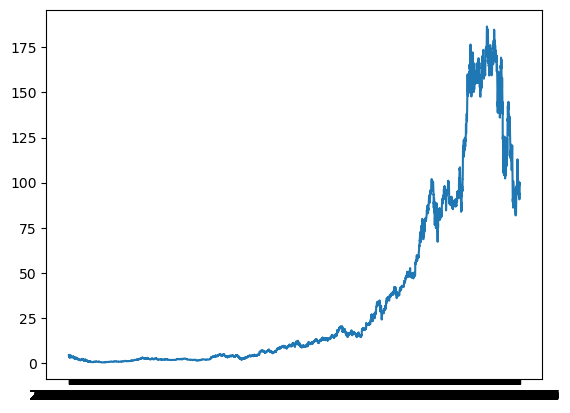

In [4]:
plt.plot(tempDataAmazon['Date'], tempDataAmazon['Close'])
plt.show()

In [5]:
df = pd.read_csv('stock_symbols.csv')
df.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$130.57,-2.5900,-1.945%,3.809522e+10,United States,1999.0,2555441,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$38.54,-1.1700,-2.946%,6.920230e+09,United States,2016.0,4358445,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.81,-0.0400,-4.706%,2.592010e+07,China,2008.0,2922,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.465,0.0600,0.526%,0.000000e+00,United States,2021.0,15832,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1217,0.0107,9.64%,0.000000e+00,United States,2021.0,46030,Finance,Blank Checks


In [22]:
symbols = list(df['Symbol'])
names = list(df['Name'])
sectors = list(df['Sector'])

sectors

['Industrials',
 'Industrials',
 'Real Estate',
 'Finance',
 'Finance',
 'Finance',
 'Health Care',
 'Consumer Staples',
 'Consumer Staples',
 'Consumer Discretionary',
 'Finance',
 'Finance',
 'Miscellaneous',
 'Technology',
 'Industrials',
 'Consumer Discretionary',
 'Technology',
 'Real Estate',
 'Finance',
 'Basic Materials',
 'Health Care',
 'Finance',
 'Health Care',
 'Health Care',
 'Consumer Staples',
 'Consumer Discretionary',
 'Health Care',
 'Finance',
 'Finance',
 'Finance',
 'Consumer Discretionary',
 'Consumer Discretionary',
 'Finance',
 'Finance',
 'Health Care',
 'Real Estate',
 nan,
 nan,
 nan,
 'Health Care',
 'Health Care',
 'Technology',
 'Health Care',
 'Health Care',
 'Health Care',
 'Finance',
 'Industrials',
 'Finance',
 'Finance',
 'Finance',
 'Finance',
 'Health Care',
 'Health Care',
 'Consumer Discretionary',
 'Consumer Discretionary',
 'Energy',
 'Consumer Discretionary',
 'Health Care',
 'Finance',
 'Finance',
 'Finance',
 'Health Care',
 'Health Care',
 

In [23]:
with open('symbols.txt', 'w') as file:
    for i in range(len(symbols)):
        name = names[i].replace("'",'')
        sector = str(sectors[i]).replace("'",'')
        line = f"{{ 'symbol': '{symbols[i]}', 'name': '{name}', 'sector': '{sector}'}}"
        file.write(line + ',\n')